In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('clean-std-norm-nasa.csv')

In [6]:
data.head()

,time,time.1,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close,class,outlier
0,-4821,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071,7,1
1,-4624,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563,7,1
2,-4475,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994,7,1
3,-4184,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778,7,1
4,-4048,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347,1,0


In [7]:
data = data.drop(columns=['time.1'],axis=0)
data

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close,class,outlier
0,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071,7,1
1,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563,7,1
2,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994,7,1
3,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778,7,1
4,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347,1,0
...,...,...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965,5,1
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395,5,1
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395,5,1
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611,5,1


In [8]:
data = data.drop(columns=['class'],axis=0)

In [9]:
data

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close,outlier
0,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071,1
1,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563,1
2,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994,1
3,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778,1
4,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347,0
...,...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965,1
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395,1
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395,1
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611,1


In [10]:
from sklearn.model_selection import *

In [11]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [12]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

In [13]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

In [14]:
n_steps = 50

In [15]:
49097 *0.2

9819.4

In [16]:
data.dropna

<bound method DataFrame.dropna of        time  Rad Flow  Fpv Close  Fpv Open      High    Bypass  Bpv Open  \
0     -4821  0.437500   0.507015  0.333333  0.638093  0.575163  0.656501   
1     -4624  0.429688   0.507401  0.358974  0.638212  0.568627  0.630819   
2     -4475  0.664062   0.506500  0.349359  0.638522  0.764706  0.686998   
3     -4184  0.664062   0.512164  0.355769  0.637878  0.764706  0.682183   
4     -4048  0.656250   0.507015  0.358974  0.638117  0.758170  0.677368   
...     ...       ...        ...       ...       ...       ...       ...   
49092  4400  0.664062   0.513451  0.355769  0.637806  0.261438  0.682183   
49093  4501  0.664062   0.506758  0.349359  0.639238  0.248366  0.686998   
49094  4692  0.429688   0.507659  0.358974  0.638260  0.032680  0.630819   
49095  4903  0.648438   0.506629  0.358974  0.637973  0.196078  0.675762   
49096  5075  0.437500   0.507015  0.333333  0.638093  0.000000  0.656501   

       Bpv Close  outlier  
0       0.598071        1

In [17]:
import matplotlib.pyplot as plt


In [18]:
data.describe()

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close,outlier
count,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000
mean,-0.063955,0.500962,0.507043,0.360371,0.638168,0.563403,0.644123,0.588846,0.071511
std,84.674481,0.069356,0.004837,0.031992,0.005210,0.087884,0.033021,0.038185,0.257680
min,-4821.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.453125,0.507015,0.349359,0.638021,0.529412,0.622793,0.572347,0.000000
50%,0.000000,0.484375,0.507015,0.368590,0.638117,0.568627,0.632424,0.575563,0.000000
75%,0.000000,0.523438,0.507015,0.375000,0.638236,0.594771,0.654896,0.581994,0.000000
max,5075.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# np.random.shuffle(data)
data

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close,outlier
0,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071,1
1,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563,1
2,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994,1
3,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778,1
4,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347,0
...,...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965,1
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395,1
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395,1
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611,1


In [20]:
Xtrain = data.iloc[:34370, :-1]
Xtrain

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close
0,-4821,0.437500,0.507015,0.333333,0.638093,0.575163,0.656501,0.598071
1,-4624,0.429688,0.507401,0.358974,0.638212,0.568627,0.630819,0.575563
2,-4475,0.664062,0.506500,0.349359,0.638522,0.764706,0.686998,0.581994
3,-4184,0.664062,0.512164,0.355769,0.637878,0.764706,0.682183,0.578778
4,-4048,0.656250,0.507015,0.358974,0.638117,0.758170,0.677368,0.572347
...,...,...,...,...,...,...,...,...
34365,0,0.593750,0.507015,0.368590,0.637950,0.660131,0.654896,0.575563
34366,0,0.437500,0.507015,0.362179,0.637926,0.555556,0.629213,0.575563
34367,0,0.453125,0.507272,0.375000,0.638308,0.535948,0.619583,0.572347
34368,0,0.437500,0.507144,0.358974,0.638522,0.575163,0.632424,0.572347


In [21]:
Ytrain = data.iloc[:34370,-1:]
Ytrain

,outlier
0,1
1,1
2,1
3,1
4,0
...,...
34365,0
34366,0
34367,0
34368,0


In [22]:
Xtest , Ytest = data.iloc[34370:44189,:-1],data.iloc[34370:44189,-1:]
Xval,Yval = data.iloc[44190:,:-1],data.iloc[44190:,-1:]

In [23]:
data.iloc[39278:,:-1]

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close
39278,1,0.539062,0.506886,0.310897,0.638117,0.660131,0.703050,0.623794
39279,1,0.484375,0.507015,0.375000,0.638833,0.555556,0.624398,0.572347
39280,1,0.671875,0.506886,0.381410,0.638117,0.679739,0.659711,0.575563
39281,1,0.468750,0.507015,0.371795,0.638308,0.562092,0.626003,0.572347
39282,1,0.570312,0.507015,0.381410,0.638713,0.607843,0.638844,0.572347
...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611


In [24]:
data.iloc[39278:,:-1]

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close
39278,1,0.539062,0.506886,0.310897,0.638117,0.660131,0.703050,0.623794
39279,1,0.484375,0.507015,0.375000,0.638833,0.555556,0.624398,0.572347
39280,1,0.671875,0.506886,0.381410,0.638117,0.679739,0.659711,0.575563
39281,1,0.468750,0.507015,0.371795,0.638308,0.562092,0.626003,0.572347
39282,1,0.570312,0.507015,0.381410,0.638713,0.607843,0.638844,0.572347
...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611


In [25]:
Xtest

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close
34370,0,0.515625,0.506886,0.362179,0.638093,0.620915,0.643660,0.575563
34371,0,0.507812,0.507144,0.362179,0.638117,0.620915,0.643660,0.572347
34372,0,0.687500,0.507015,0.358974,0.637926,0.777778,0.683788,0.575563
34373,0,0.468750,0.507015,0.320513,0.638284,0.607843,0.675762,0.610932
34374,0,0.468750,0.507144,0.298077,0.638188,0.601307,0.701445,0.636656
...,...,...,...,...,...,...,...,...
44184,3,0.437500,0.507015,0.355769,0.638117,0.568627,0.635634,0.578778
44185,3,0.484375,0.507015,0.381410,0.638117,0.535948,0.621188,0.572347
44186,3,0.468750,0.507015,0.362179,0.637687,0.568627,0.634029,0.575563
44187,3,0.507812,0.507015,0.371795,0.638284,0.594771,0.634029,0.572347


In [26]:
Xval

,time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Open,Bpv Close
44190,3,0.453125,0.507015,0.371795,0.637830,0.529412,0.622793,0.575563
44191,3,0.523438,0.506500,0.371795,0.637544,0.588235,0.637239,0.575563
44192,3,0.656250,0.507015,0.416667,0.638164,0.320261,0.619583,0.623794
44193,3,0.507812,0.507015,0.387821,0.638117,0.516340,0.617978,0.575563
44194,3,0.500000,0.507015,0.387821,0.638140,0.522876,0.616372,0.572347
...,...,...,...,...,...,...,...,...
49092,4400,0.664062,0.513451,0.355769,0.637806,0.261438,0.682183,0.700965
49093,4501,0.664062,0.506758,0.349359,0.639238,0.248366,0.686998,0.707395
49094,4692,0.429688,0.507659,0.358974,0.638260,0.032680,0.630819,0.707395
49095,4903,0.648438,0.506629,0.358974,0.637973,0.196078,0.675762,0.710611


In [27]:
Xtrain =Xtrain.values.reshape(Xtrain.shape[0],Xtrain.shape[1],1)
Xval = Xval.values.reshape(Xval.shape[0],Xval.shape[1],1)
Xtest = Xtest.values.reshape(Xtest.shape[0],Xtest.shape[1],1)

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [29]:
Xtrain.shape[0],Xtrain.shape[1]

(34370, 8)

In [29]:
model = keras.models.Sequential([
        keras.layers.LSTM(128,input_shape=[Xtrain.shape[1],1]),
        keras.layers.Dense(100),
        keras.layers.Dense(100),
        keras.layers.TimeDistributed(Dense(1, activation='relu'))])

model.compile(loss="mse", optimizer="adam",metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain, epochs=50,
                    validation_data=(Xval, Yval))

Epoch 1/50
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0219 - accuracy: 0.9821 - val_loss: 3.6325 - val_accuracy: 0.1096
Epoch 2/50
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 3.5472 - val_accuracy: 0.0978
Epoch 3/50
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 8.4237 - val_accuracy: 0.1043
Epoch 4/50
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 7.8322 - val_accuracy: 0.1096
Epoch 5/50
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 7.2497 - val_accuracy: 0.1096
Epoch 6/50
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 4.1615 - val_accuracy: 0.1096
Epoch 7/50
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0050 - accuracy: 0.9979 - val_loss: 3.1536 - val_accuracy:

In [30]:
model.evaluate(Xtest, Ytest)

307/307 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 1.0000


[0.002803003415465355, 1.0]

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 89,661
Trainable params: 89,661
Non-trainable params: 0
_________________________________________________________________


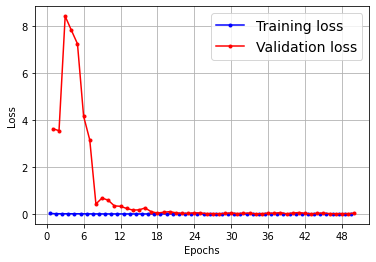

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [33]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

In [34]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])

    plt.legend(fontsize=14)

In [35]:
# predict probabilities for test set
ypred_probs = model.predict(Xtest, verbose=0)
# predict crisp classes for test set
ypred_classes = model.predict_classes(Xtest, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
# reduce to 1d array
ypred_probs = ypred_probs[:, 0]
ypred_classes = ypred_classes[:, 0]


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(Ytest, ypred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, ypred_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, ypred_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, ypred_classes)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [39]:
model2 = keras.models.Sequential([
        keras.layers.LSTM(128,input_shape=[Xtrain.shape[1],1]),
        keras.layers.Dense(100),
        keras.layers.Dense(100),
        keras.layers.TimeDistributed(Dense(1, activation='relu'))])

model2.compile(loss="mse", optimizer="adam",metrics=['accuracy'])
history = model2.fit(Xtrain, Ytrain, epochs=20,
                    validation_data=(Xval, Yval))

Epoch 1/20
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0207 - accuracy: 0.9850 - val_loss: 3.2843 - val_accuracy: 0.1092
Epoch 2/20
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 5.9427 - val_accuracy: 0.0970
Epoch 3/20
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 3.6906 - val_accuracy: 0.0982
Epoch 4/20
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 3.0147 - val_accuracy: 0.0974
Epoch 5/20
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 3.7069 - val_accuracy: 0.1127
Epoch 6/20
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 2.1981 - val_accuracy: 0.1096
Epoch 7/20
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 1.6127 - val_accuracy:

In [45]:
model2.evaluate(Xtest, Ytest)

307/307 [==============================] - 1s 3ms/step - loss: 0.1839 - accuracy: 0.7254


[0.18390803039073944, 0.7254303097724915]

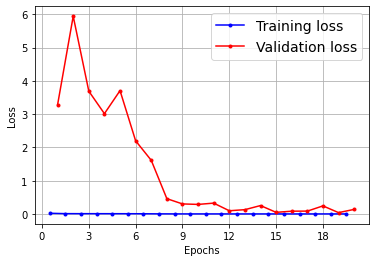

In [46]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [47]:
# predict probabilities for test set
ypred_probs = model2.predict(Xtest, verbose=0)
# predict crisp classes for test set
ypred_classes = model2.predict_classes(Xtest, verbose=0)

In [48]:
# reduce to 1d array
ypred_probs = ypred_probs[:, 0]
ypred_classes = ypred_classes[:, 0]

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(Ytest, ypred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, ypred_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, ypred_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, ypred_classes)
print('F1 score: %f' % f1)

Accuracy: 0.725430
Precision: 0.200474
Recall: 1.000000
F1 score: 0.333992


In [51]:
model3 = keras.models.Sequential([
        keras.layers.LSTM(256,input_shape=[Xtrain.shape[1],1]),
        keras.layers.Dense(100),
        keras.layers.Dense(100),
        keras.layers.Dense(100),
        keras.layers.Dense(1)])

model3.compile(loss="mse", optimizer="adam",metrics=['accuracy'])
history = model3.fit(Xtrain, Ytrain, epochs=30,
                    validation_data=(Xval, Yval))

Epoch 1/30
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0253 - accuracy: 0.9784 - val_loss: 2.2211 - val_accuracy: 0.0962
Epoch 2/30
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 5.6884 - val_accuracy: 0.1076
Epoch 3/30
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 4.1234 - val_accuracy: 0.1096
Epoch 4/30
1075/1075 [==============================] - 4s 4ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 4.2844 - val_accuracy: 0.1096
Epoch 5/30
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0053 - accuracy: 0.9978 - val_loss: 2.2141 - val_accuracy: 0.1096
Epoch 6/30
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0029 - accuracy: 0.9981 - val_loss: 1.3923 - val_accuracy: 0.1096
Epoch 7/30
1075/1075 [==============================] - 5s 5ms/step - loss: 0.0025 - accuracy: 0.9981 - val_loss: 1.2400 - val_accuracy:

In [57]:
model3.evaluate(Xtest, Ytest)

307/307 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.9861


[0.018292713910341263, 0.9861493110656738]

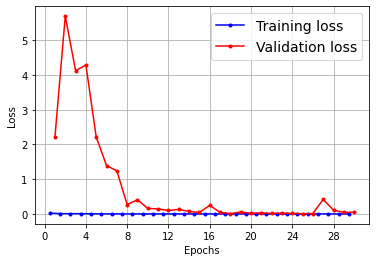

In [53]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [54]:
# predict probabilities for test set
ypred_probs = model3.predict(Xtest, verbose=0)
# predict crisp classes for test set
ypred_classes = model3.predict_classes(Xtest, verbose=0)

In [55]:
# reduce to 1d array
ypred_probs = ypred_probs[:, 0]
ypred_classes = ypred_classes[:, 0]

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(Ytest, ypred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, ypred_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, ypred_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, ypred_classes)
print('F1 score: %f' % f1)

Accuracy: 0.986149
Precision: 1.000000
Recall: 0.798817
F1 score: 0.888158


In [31]:
model4 = keras.models.Sequential([
        keras.layers.LSTM(256,return_sequences=True,input_shape=[Xtrain.shape[1],1]),
    keras.layers.LSTM(256,return_sequences=True,input_shape=[Xtrain.shape[1],1]),
        keras.layers.Dense(100),
        keras.layers.Dense(100),
        keras.layers.Dense(100),
        keras.layers.TimeDistributed(Dense(1, activation='relu'))])

model4.compile(loss="mse", optimizer="adam",metrics=['accuracy'])
history = model4.fit(Xtrain, Ytrain, epochs=30,
                    validation_data=(Xval, Yval))

Epoch 1/30
1075/1075 [==============================] - 9s 8ms/step - loss: 0.0611 - accuracy: 0.9346 - val_loss: 0.0982 - val_accuracy: 0.8904
Epoch 2/30
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0599 - accuracy: 0.9354 - val_loss: 0.0973 - val_accuracy: 0.8904
Epoch 3/30
1075/1075 [==============================] - 8s 8ms/step - loss: 0.0598 - accuracy: 0.9354 - val_loss: 0.1003 - val_accuracy: 0.8904
Epoch 4/30
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0594 - accuracy: 0.9361 - val_loss: 0.0997 - val_accuracy: 0.8904
Epoch 5/30
1075/1075 [==============================] - 8s 8ms/step - loss: 0.0593 - accuracy: 0.9364 - val_loss: 0.1175 - val_accuracy: 0.8926
Epoch 6/30
1075/1075 [==============================] - 8s 8ms/step - loss: 0.0428 - accuracy: 0.9538 - val_loss: 0.1805 - val_accuracy: 0.7934
Epoch 7/30
1075/1075 [==============================] - 8s 7ms/step - loss: 0.0358 - accuracy: 0.9622 - val_loss: 0.2343 - val_accuracy:

In [32]:
model4.evaluate(Xtest, Ytest)

307/307 [==============================] - 1s 4ms/step - loss: 0.1975 - accuracy: 0.7940


[0.1975088119506836, 0.7940472364425659]

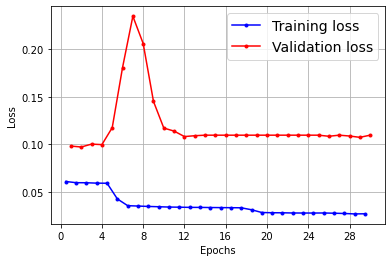

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()


In [36]:
# predict probabilities for test set
ypred_probs = model4.predict(Xtest, verbose=0)
# predict crisp classes for test set
ypred_classes = model4.predict_classes(Xtest, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
# reduce to 1d array
ypred_probs = ypred_probs[:, 0]
ypred_classes = ypred_classes[:, 0]

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(Ytest, ypred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, ypred_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, ypred_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, ypred_classes)
print('F1 score: %f' % f1)

Accuracy: 0.931154
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
# Model is from 
import os
import random 

tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


### CREATE MODEL ###

losses = [lambda y,f: q_loss(0.1,y,f), lambda y,f: q_loss(0.5,y,f), lambda y,f: q_loss(0.9,y,f)]

inputs = Input(shape=(Xtrain.shape[1], Xtrain.shape[2]))
lstm = Bidirectional(LSTM(64, return_sequences=True, dropout=0.5))(inputs, training = True)
lstm = Bidirectional(LSTM(16, return_sequences=False, dropout=0.5))(lstm, training = True)
dense = Dense(50)(lstm)
out10 = Dense(1)(dense)
out50 = Dense(1)(dense)
out90 = Dense(1)(dense)
model = Model(inputs, [out10,out50,out90])

model.compile(loss='mse', optimizer='adam', loss_weights = [0.3,0.3,0.3], metrics=['accuracy'])
model.fit(Xtrain, [Ytrain,Ytrain,Ytrain], epochs=50, batch_size=128, verbose=2)

NameError: name 'tf' is not defined

In [88]:
model.predict(Xtest)
model.evaluate(Xtest,Ytest)

307/307 [==============================] - 2s 6ms/step - loss: 0.0371 - dense_20_loss: 0.0412 - dense_21_loss: 0.0415 - dense_22_loss: 0.0411 - dense_20_accuracy: 0.9470 - dense_21_accuracy: 0.9469 - dense_22_accuracy: 0.9468


[0.03714465722441673,
 0.041211795061826706,
 0.041476815938949585,
 0.041126880794763565,
 0.9470414519309998,
 0.9469395875930786,
 0.9468377828598022]

In [89]:
from matplotlib import pyplot


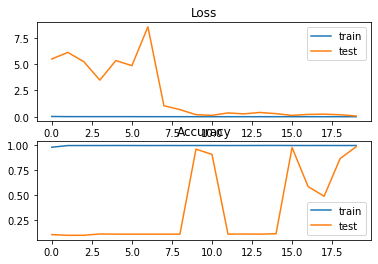

In [90]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()